## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_merge_df = pd.merge(mouse_metadata,study_results, on = ["Mouse ID"])

# Display the data table for preview
data_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = len(data_merge_df["Mouse ID"].unique())
print(mice_count)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoint_df = data_merge_df[data_merge_df[["Mouse ID","Timepoint"]].duplicated()]
duplicate_timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_id_df = data_merge_df.loc[data_merge_df["Mouse ID"] == "g989"]
duplicated_id_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged_df = data_merge_df[data_merge_df["Mouse ID"] != "g989"]
cleaned_merged_df["Mouse ID"].value_counts()


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(cleaned_merged_df["Mouse ID"].unique())
print(clean_mice_count)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 



grouped_regimen_df = cleaned_merged_df.groupby("Drug Regimen")
drug_mean = grouped_regimen_df["Tumor Volume (mm3)"].mean()
drug_median = grouped_regimen_df["Tumor Volume (mm3)"].median()
drug_variance = grouped_regimen_df["Tumor Volume (mm3)"].var()
drug_deviation = grouped_regimen_df["Tumor Volume (mm3)"].std()
SEM = drug_deviation / (len(grouped_regimen_df["Tumor Volume (mm3)"])**.5)


# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame()
summary_stats_df["Mean"] = drug_mean
summary_stats_df["Median"] = drug_median
summary_stats_df["Variance"] = drug_variance
summary_stats_df["Standard Deviation"] = drug_deviation
summary_stats_df["Standard Error Mean"] = SEM
summary_stats_df


,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,1.579486
Ceftamin,52.591172,51.776157,39.290177,6.268188,1.982175
Infubinol,52.884795,51.820584,43.128684,6.567243,2.076745
Ketapril,55.235638,53.698743,68.553577,8.279709,2.618274
Naftisol,54.331565,52.509285,66.173479,8.134708,2.572421
Placebo,54.033581,52.288934,61.168083,7.821003,2.473218
Propriva,52.320930,50.446266,43.852013,6.622085,2.094087
Ramicane,40.216745,40.673236,23.486704,4.846308,1.532537
Stelasyn,54.233149,52.431737,59.450562,7.710419,2.438249


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_by_agg_df = grouped_regimen_df["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
stats_by_agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

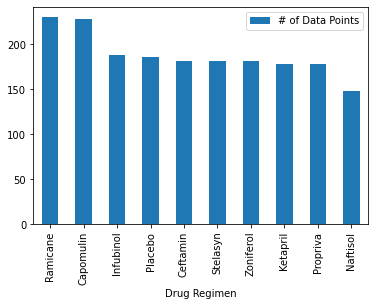

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_graph = pd.DataFrame({"Drug Regimen":cleaned_merged_df["Drug Regimen"].unique(), "# of Data Points":cleaned_merged_df["Drug Regimen"].value_counts()})
bar_graph.plot.bar(x = "Drug Regimen", y = "# of Data Points")



<BarContainer object of 10 artists>

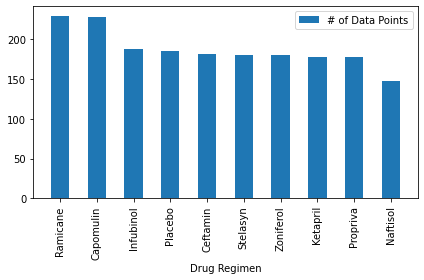

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_graph_plot = plt.bar(cleaned_merged_df["Drug Regimen"].unique(),cleaned_merged_df["Drug Regimen"].value_counts(), width =.5,
                         tick_label = cleaned_merged_df["Drug Regimen"].unique(), label = "# of Data Points" 
                         )
plt.legend(loc = "upper right")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.tight_layout()
bar_graph_plot



Male      958
Female    922
Name: Sex, dtype: int64

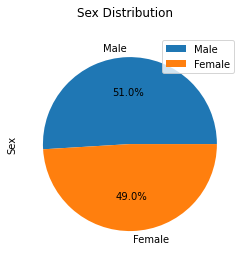

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = cleaned_merged_df["Sex"].value_counts()
pandas_pie_chart = pie.plot.pie(y="Sex", subplots = True, title = "Sex Distribution",legend = True, autopct = "%1.1f%%")
cleaned_merged_df["Sex"].value_counts()


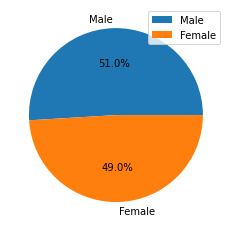

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_dict = {"Male":pie["Male"], "Female":pie["Female"]}

pyplot_pie_char = plt.pie(pie_dict.values(), labels = ["Male","Female"], autopct = "%1.1f%%")
plt.legend(loc = "upper right")







## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the best treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin  
#Create a df with the last timepoints, merge back with original df and pull corresponding rows by merging on the Mouse ID and the timepoint

last_tumor_volume = cleaned_merged_df.groupby("Mouse ID")["Timepoint"].max()
final_clean_df = pd.merge(last_tumor_volume, cleaned_merged_df, on = ["Mouse ID", "Timepoint"])
final_clean_df





,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Tumor volume filtered by top 4 Drug Regimen (Capomulin, Ramicane, Infubinol, Ceftamin) ; initialize a dictionary for storage
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = {}
outliers = {}

#Check the newly generated DF for any rows matching the drug name given in the drug_list
for drug in drug_list:
    tumor_volume[drug] = final_clean_df[final_clean_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
#With our newly formed tumor_volume dictionary, check each drug(key)'s list and print if there are any outliers.
for key in tumor_volume:

    quartile1 = tumor_volume[key].quantile(0.25)
    quartile3 = tumor_volume[key].quantile(0.75)

    iqr = quartile3 - quartile1

    lower = quartile1 - (1.5 * iqr)
    upper = quartile3 + (1.5 * iqr)
  
    for i in tumor_volume[key]:
        if i >= upper:
            mouse = final_clean_df[final_clean_df["Tumor Volume (mm3)"] == i]["Mouse ID"]
            print(f"{i} is an upper outlier")
        if i <= lower:
            mouse = final_clean_df[final_clean_df["Tumor Volume (mm3)"] == i]["Mouse ID"].item()
            print(f"{i} is a lower outlier of the {key} regimen in {mouse}'s trial")
    
            



    



36.3213458 is a lower outlier of the Infubinol regimen in c326's trial


<AxesSubplot:>

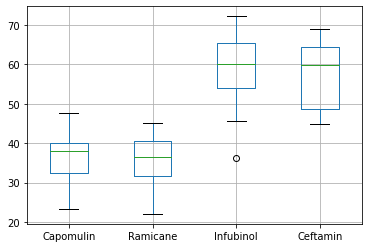

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume_df = pd.DataFrame(tumor_volume)
tumor_volume_df.boxplot(column = drug_list)

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

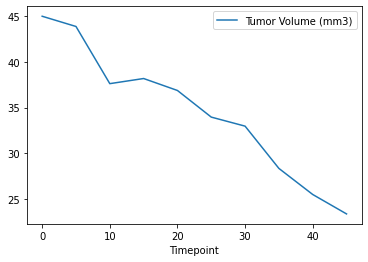

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = cleaned_merged_df[cleaned_merged_df["Drug Regimen"]=="Capomulin"]
s185_trial_df = Capomulin_df[Capomulin_df["Mouse ID"] == "s185"][["Timepoint","Tumor Volume (mm3)"]]
s185_trial_df
s185_trial_df.plot.line(x="Timepoint", y = "Tumor Volume (mm3)")

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

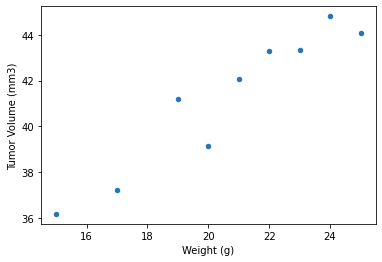

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_and_weight_df = Capomulin_df[["Tumor Volume (mm3)", "Weight (g)","Mouse ID"]]
average_weight = tumor_and_weight_df.groupby("Weight (g)").mean().reset_index()
average_weight.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)")


## Correlation and Regression

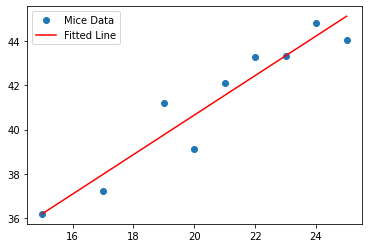

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Correlation_coef = average_weight.corr()
x = average_weight["Weight (g)"]
y = average_weight["Tumor Volume (mm3)"]
linear_model = st.linregress(x,y)
plt.plot(x,y,"o", label = "Mice Data")
plt.plot(x, linear_model.intercept + linear_model.slope*x, 'r', label = "Fitted Line")
plt.legend()
plt.show()